# Notebook principal pour le projet FRI - WEB

#### Élèves : Cassedanne Louis & Lévêque Hippolyte

## Avant-propos

Ce notebook parmet à l'évaluateur de tester le code développé dans le cadre du projet. Il se contente donc juste d'importer les fonctions développées dans la libraires `websearch` du répertoire de travail.
Nous invitons donc le correcteur à regarder à cet endroit pour une vue direct du code.

## Tâche 1 : Création d’un index inversé et moteur de recherche booléen et vectoriel

Quelques import de functions utilitaires dont nous nous servirons dans la suite

In [1]:
from websearch.lib import get_size_of

### 2.1 Traitement linguistique

Commençons par lire les données, et leur appliquer le travail de pré-processing décrit dans le sujet du projet.

!! ATTENTION : Cette opération peut prendre un certain temps. Pour aller plus vite, on pourra passer à la cellule suivante.

In [ ]:
from websearch.semantic import read_and_process

data = read_and_process()

* Reading data
/Users/hippolyteleveque/Documents/cs/ecp/cours_osy/websearch/env/lib/python3.6/site-packages/websearch/data/cacm.json
* Loading Spacy model... DONE
* Tokenization


In [2]:
import pickle

with open("../processed_data.pickle", 'rb') as outfile:
    data = pickle.load(outfile)

La cellule suivante appelle et run une fonction qui répond en output aux question 1 à 5. (relancez la cellule une deuxième fois si les graphes ne s'affichent pas)

Nombre de tokens: 218372
Taille du vocabulaire : 25269
Nombre de tokens pour la moitié de la collection: 27972
Taille du vocabulaire pour la moitié de la collection: 11249
Le facteur k est : 199.48
Le facteur b est :0.39
Taille du vocabulaire pour 1M de tokens : 46007


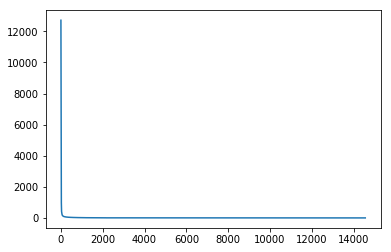

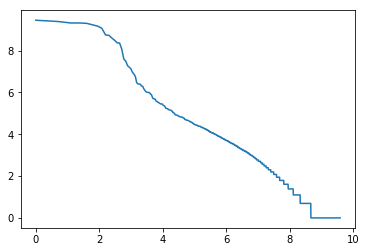

In [4]:
from websearch.semantic import main
main(data)

# Traitement de la collection CACM



### Indexation

#### Création de l'index inversé et des dictionnaires utilitaires

Construisons l'index demandé, ainsi que le dictionnaire (termeID, terme)

In [6]:
from websearch.index_bsbi_cacm import bsbi_index_construction
memory_size = 100000
index, term_dict = bsbi_index_construction(data, memory_size)

reading block
updating data
inverting block

Duration :  0 min 1.06 sec


Regardons maintenant la taille de notre index

In [7]:
get_size_of(index)

Size : 589 928 bytes


A partir des données `data`, construisons maintenant le dictionnaire (docID, doc)

In [8]:
from websearch.index_bsbi_cacm import create_doc_dict
doc_dict = create_doc_dict(data)

#### Modèle de recherche booléen

Pour ce modèle de recherche, l'utilisateur peut indiquer quels termes doivent ou ne doivent pas se trouver dans le document recherché, en respectant le format de requête comme défini dans la cellule ci-dessous.

In [9]:
from websearch.search_model_cacm import main_boolean_cacm
request = '(trip) AND (device OR circle)'
main_boolean_cacm(request, index, term_dict, doc_dict)

Generating SAT request ... SUCCESS :
     SAT request --> [[('trip', 1)], [('device', 1), ('circle', 1)]]
{116}


========================  RESULTS  =========================


------------------------------------------------------------


* title : The Sumador Chino


* resume : On a recent motor trip through Mexico, the writercame across on adding device which was referred to as a sumador chino (Chinese adder).  A survey of the moreavailable literature on the history of mathematics and on instruments of calculation has uncovered no referenceto such a device.  The purpose of this communication is to enlist the help of other members in bringing tolight whatever may be known concerning the evolution and present status of the sumador chino.


------------------------------------------------------------

Duration :  0 min 0.0 sec


#### Modèle de recherche vectoriel

Pondération tf-idf 


In [10]:
from websearch.search_model_cacm import main_vectorial_cacm
query="programming language"
number_of_wanted_docs = 5

main_vectorial_cacm(query, index, term_dict, doc_dict, number_of_wanted_docs,data)

res:  [(14, 0.2818097067329423), (11, 0.2818097067329423), (1137, 0.3079213753828479), (631, 0.3378911950204159), (987, 0.4072722362073733)]
ordered list:  [987, 631, 1137, 11, 14]


========================  RESULTS  =========================


------------------------------------------------------------


* title : FORTRAN vs. Basic FORTRAN (A Programming Language


------------------------------------------------------------
------------------------------------------------------------


* title : Automatic-Programming-Language Translation Through Syntactical Analysis*


------------------------------------------------------------
------------------------------------------------------------


* title : A Format Language*


------------------------------------------------------------
------------------------------------------------------------


* title : The Problem of Programming Communication with


------------------------------------------------------------
----------------------

In [11]:
res = main_vectorial_cacm(query, index, term_dict, doc_dict, number_of_wanted_docs,data)

res:  [(14, 0.2818097067329423), (11, 0.2818097067329423), (1137, 0.3079213753828479), (631, 0.3378911950204159), (987, 0.4072722362073733)]
ordered list:  [987, 631, 1137, 11, 14]


========================  RESULTS  =========================


------------------------------------------------------------


* title : FORTRAN vs. Basic FORTRAN (A Programming Language


------------------------------------------------------------
------------------------------------------------------------


* title : Automatic-Programming-Language Translation Through Syntactical Analysis*


------------------------------------------------------------
------------------------------------------------------------


* title : A Format Language*


------------------------------------------------------------
------------------------------------------------------------


* title : The Problem of Programming Communication with


------------------------------------------------------------
----------------------

Note : Les documents renvoyés sont petits (majoritairement sans contenu car la mesure cosinus est inversement proportionnelle à la somme des poids au carré

Pondération fréquence normalisée

In [12]:
from websearch.search_model_cacm import main_vectorial_cacm_normalized_frequency
query = "programming language"
number_of_wanted_docs = 5
main_vectorial_cacm_normalized_frequency(query, index, term_dict, doc_dict, number_of_wanted_docs,data)


Duration :  0 min 0.59 sec
res:  [(3155, 0.49999999999999994), (223, 0.49999999999999994), (889, 0.5773502691896258), (631, 0.5773502691896258), (1336, 0.7071067811865475)]
ordered list:  [1336, 631, 889, 223, 3155]


========================  RESULTS  =========================


------------------------------------------------------------


* title : NPL: Highlights of A New Programming Language


------------------------------------------------------------
------------------------------------------------------------


* title : Automatic-Programming-Language Translation Through Syntactical Analysis*


------------------------------------------------------------
------------------------------------------------------------


* title : Official Actions and Responses to ALGOL As a Programming Language


------------------------------------------------------------
------------------------------------------------------------


* title : Selfcipher: Programming


--------------------------

# Traitement collection CS


### Indexation

#### Création de l'index inversé et des dictionnaires utilitaires

Construisons l'index demandé, ainsi que les dictionnaires (term,termID) et (docID,doc)

!! ATTENTION : Cette opération peut prendre un certain temps. Pour aller plus vite, on pourra passer à la cellule suivante pour charger l'index à partir d'un pickle

In [12]:
import os
from websearch.index_bsbi_cs import bsbi_index_construction
root_path = '../pa1-data/'
paths = os.listdir(root_path)
cs = [root_path + path + "/" for path in paths]

answer = bsbi_index_construction(cs)
index_cs = answer[0]
termID_cs = answer[1]
docID_cs = answer[2]

reading block
inverting block
reading block
inverting block
reading block
inverting block
reading block
inverting block
reading block
inverting block
reading block
inverting block
reading block
inverting block
reading block
inverting block
reading block
inverting block
reading block
inverting block


... Ou chargeons directement l'index et les dictionnaires utilitaires 

In [13]:
import pickle
with open("../index_cs.pickle", 'rb') as outfile_index:
    index_cs = pickle.load(outfile_index)
with open("../termID_cs.pickle", 'rb') as outfile_termID:
    termID_cs = pickle.load(outfile_termID)
with open("../docID_cs.pickle", 'rb') as outfile_docID:
    docID_cs = pickle.load(outfile_docID)


Voici maintenant les réponses aux question 1 à 5 pour la collection CS. (Comme pour la collection CACM, on pourra relancer la celulle si les graphes ne s'affichent pas la première fois)

Nombre de tokens: 15963913
Taille du vocabulaire : 347071
Nombre de tokens pour la moitié de la collection: 7574719
Taille du vocabulaire pour la moitié de la collection: 203415
Le facteur k est : 2.39
Le facteur b est :0.72
Taille du vocabulaire pour 1M de tokens : 47662


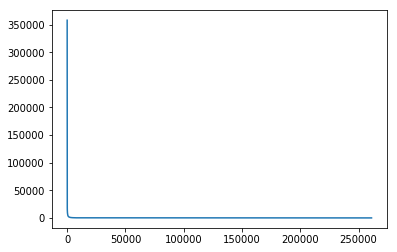

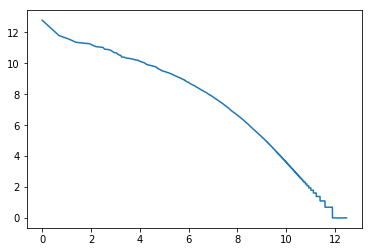

In [14]:
from websearch.semantic_cs import main_cs
main_cs(docID_cs)

#### Modèle de recherche booléen

In [15]:
from websearch.search_model_cs import main_boolean_cs
request = '(course) AND (menu) AND (information) AND (home) AND (location) AND (library) AND (institutional)'
main_boolean_cs(request, index_cs, termID_cs, docID_cs)

Generating SAT request ... SUCCESS :
     SAT request --> [[('course', 1)], [('menu', 1)], [('information', 1)], [('home', 1)], [('location', 1)], [('library', 1)], [('institutional', 1)]]
{71752, 75945, 69809, 72708}


========================  RESULTS  =========================


------------------------------------------------------------


* title : /Users/hippolyteleveque/Documents/cs/ecp/cours_osy/websearch/pa1-data/3/lib.stanford.edu_mathematics-statistics-library_access-circulation


* raw_doc : access & circulation sulair sulair home searchworks e journals databases off campus access ask us math stat library banner mathematics & statistics library home how do i new books contact us search mathematics & statistics library library web sites searchworks databases az socrates google books google scholar search this site mathematics & statistics library about the mathematics & statistics library access & circulation course reserves cs collection has moved e book resources guides & 

#### Modèles de recherche Vectoriels

pondération tf-idf

In [16]:
from websearch.search_model_cs import main_vectorial_cs
query="programming language"
number_of_wanted_docs = 5

main_vectorial_cs(query, index_cs, termID_cs, docID_cs , number_of_wanted_docs)

res:  [(47233, 0.16271243783070558), (29169, 0.16391419613583993), (73650, 0.18060652783822587), (75008, 0.19160972107579563), (80426, 0.2978947597045685)]
ordered list:  [80426, 75008, 73650, 29169, 47233]


========================  RESULTS  =========================


------------------------------------------------------------


* title : /Users/hippolyteleveque/Documents/cs/ecp/cours_osy/websearch/pa1-data/2/graphics.stanford.edu_courses_cs164-09-spring_menu.html


* raw_doc : cs164 menu course information handouts lecture notes programming useful links home



------------------------------------------------------------
------------------------------------------------------------


* title : /Users/hippolyteleveque/Documents/cs/ecp/cours_osy/websearch/pa1-data/3/infolab.stanford.edu_TR_CS-TR-72-267.html


* raw_doc : report number cs tr 72 267 institution stanford university department of computer science title mathematical programming language an appraisal based on practical exp

Pondération par frequence normalisée

In [17]:
from websearch.search_model_cs import main_vectorial_cs_normalized_frequency
query="programming language"
number_of_wanted_docs = 5

main_vectorial_cs_normalized_frequency(query, index_cs, termID_cs,docID_cs, number_of_wanted_docs)


Duration :  0 min 17.12 sec
res:  [(70854, 0.28829998806257906), (26555, 0.2923016917307631), (20570, 0.2933408935642409), (77659, 0.303488489333442), (73650, 0.33824071260127314)]
ordered list:  [73650, 77659, 20570, 26555, 70854]


========================  RESULTS  =========================


------------------------------------------------------------


* title : /Users/hippolyteleveque/Documents/cs/ecp/cours_osy/websearch/pa1-data/3/infolab.stanford.edu_TR_CS-TR-73-403.html


* raw_doc : report number cs tr 73 403 institution stanford university department of computer science title hints on programming language design author hoare car date december 1973 abstract this paper based on a keynote address presented at the sigact sigplan symposium on principles of programming languages boston october 1 3 1973 presents the view that a programming language is a tool which should assist the programmer in the most difficult aspects of his art namely program design documentation and debuggin

### Evaluation pour la collection CACM

#### Mesures de performances

Rechargons à nouveau les données dans leur état initial pour évaluer nos performances.

In [18]:
import pickle

with open("../processed_data.pickle", 'rb') as outfile:
    raw_data = pickle.load(outfile)

In [20]:
from websearch.index_bsbi_cacm import bsbi_index_construction
from websearch.search_model_cacm import main_boolean_cacm
from websearch.search_model_cacm import main_vectorial_cacm
from websearch.index_bsbi_cacm import create_doc_dict
from websearch.lib import get_size_of
doc_dict = create_doc_dict(raw_data)

msg = "\nTemps de création de l'index"
print(msg)
print("=" * len(msg))
index, term_dict = bsbi_index_construction(raw_data, 100000)

msg = "\nTaille de l'index :"
print(msg)
print("=" * len(msg))
get_size_of(index)

msg = "\nTemps de réponse modèle booléen"

print(msg)
print("=" * len(msg))
request = '(trip) AND (device OR circle)'
main_boolean_cacm(request, index, term_dict, doc_dict)

msg = "\nTemps de réponse modèle vectoriel"
print(msg)
print("=" * len(msg))
query="programming language"
number_of_wanted_docs = 5
main_vectorial_cacm(query, index, term_dict, doc_dict, number_of_wanted_docs, raw_data)


Temps de création de l'index
reading block
updating data
inverting block

Duration :  0 min 0.96 sec

Taille de l'index :
Size : 589 928 bytes

Temps de réponse modèle booléen
Generating SAT request ... SUCCESS :
     SAT request --> [[('trip', 1)], [('device', 1), ('circle', 1)]]
{116}


========================  RESULTS  =========================


------------------------------------------------------------


* title : The Sumador Chino


* resume : On a recent motor trip through Mexico, the writercame across on adding device which was referred to as a sumador chino (Chinese adder).  A survey of the moreavailable literature on the history of mathematics and on instruments of calculation has uncovered no referenceto such a device.  The purpose of this communication is to enlist the help of other members in bringing tolight whatever may be known concerning the evolution and present status of the sumador chino.


------------------------------------------------------------

Duration :

#### Mesures de pertinence

Cette partie n'a été que partiellement réalisée, faute de temps et de résultats

Nous allons ici lancer les 64 requêtes de query.text, ceci peut prendre quelques minutes.

In [21]:
from websearch.search_model_cacm import main_vectorial_cacm
from websearch.search_model_cacm import main_vectorial_cacm_normalized_frequency
from websearch.evaluation import read_query_file, update_queries_with_qrels, compute_prediction, compute_measure

path = "../websearch/data/query.text"
data = read_query_file(path)
data = update_queries_with_qrels(data, "../websearch/data/qrels.text")

ModuleNotFoundError: No module named 'websearch.evaluation'

Créons la courbe rappel/précision sur la première requête de la liste

In [22]:
from websearch.evaluation import create_rappel_preci_lists

doc = data[0]
rappels, precis = create_rappel_preci_lists(doc, index, term_dict, doc_dict, raw_data)

ModuleNotFoundError: No module named 'websearch.evaluation'

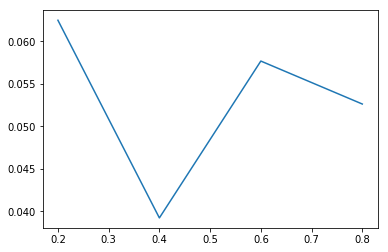

In [5]:
import matplotlib.pyplot as plt
plt.figure("Precision vs Rappel")
plt.plot(rappels, precis)
plt.show()

### Compression de l'index

In [2]:
from websearch.index_bsbi_cacm_compressed import bsbi_index_construction
compressed_index, term_dict = bsbi_index_construction(data, 100000)

reading block
updating data
inverting block
reading block
updating data
inverting block
reading block
updating data
inverting block
b'\x81'
b'\x82'
b'\x83'
b'\x84'
b'\x85'
b'\x86'
b'\x87'
b'\x88'
b'\x89'
b'\x8a'
b'\x8b'
b'\x8c'
b'\x8d'
b'\x8e'
b'\x8f'
b'\x90'
b'\x91'
b'\x92'
b'\x93'
b'\x94'
b'\x95'
b'\x96'
b'\x97'
b'\x98'
b'\x99'
b'\x9a'
b'\x9b'
b'\x9c'
b'\x9d'
b'\x9e'
b'\x9f'
b'\xa0'
b'\xa1'
b'\xa2'
b'\xa3'
b'\xa4'
b'\xa5'
b'\xa6'
b'\xa7'
b'\xa8'
b'\xa9'
b'\xaa'
b'\xab'
b'\xac'
b'\xad'
b'\xae'
b'\xaf'
b'\xb0'
b'\xb1'
b'\xb2'
b'\xb3'
b'\xb4'
b'\xb5'
b'\xb6'
b'\xb7'
b'\xb8'
b'\xb9'
b'\xba'
b'\xbb'
b'\xbc'
b'\xbd'
b'\xbe'
b'\xbf'
b'\xc0'
b'\xc1'
b'\xc2'
b'\xc3'
b'\xc4'
b'\xc5'
b'\xc6'
b'\xc7'
b'\xc8'
b'\xc9'
b'\xca'
b'\xcb'
b'\xcc'
b'\xcd'
b'\xce'
b'\xcf'
b'\xd0'
b'\xd1'
b'\xd2'
b'\xd3'
b'\xd4'
b'\xd5'
b'\xd6'
b'\xd7'
b'\xd8'
b'\xd9'
b'\xda'
b'\xdb'
b'\xdc'
b'\xdd'
b'\xde'
b'\xdf'
b'\xe0'
b'\xe1'
b'\xe2'
b'\xe3'
b'\xe4'
b'\xe5'
b'\xe6'
b'\xe7'
b'\xe8'
b'\xe9'
b'\xea'
b'\xeb'
b'\xec'
b'\x

b'\x0c\xc2'
b'\x0c\xc3'
b'\x0c\xc4'
b'\x0c\xc5'
b'\x0c\xc6'
b'\x0c\xc7'
b'\x0c\xc8'
b'\x0c\xc9'
b'\x0c\xca'
b'\x0c\xcb'
b'\x0c\xcc'
b'\x0c\xcd'
b'\x0c\xce'
b'\x0c\xcf'
b'\x0c\xd0'
b'\x0c\xd1'
b'\x0c\xd2'
b'\x0c\xd3'
b'\x0c\xd4'
b'\x0c\xd5'
b'\x0c\xd6'
b'\x0c\xd7'
b'\x0c\xd8'
b'\x0c\xd9'
b'\x0c\xda'
b'\x0c\xdb'
b'\x0c\xdc'
b'\x0c\xdd'
b'\x0c\xde'
b'\x0c\xdf'
b'\x0c\xe0'
b'\x0c\xe1'
b'\x0c\xe2'
b'\x0c\xe3'
b'\x0c\xe4'
b'\x0c\xe5'
b'\x0c\xe6'
b'\x0c\xe7'
b'\x0c\xe8'
b'\x0c\xe9'
b'\x0c\xea'
b'\x0c\xeb'
b'\x0c\xec'
b'\x0c\xed'
b'\x0c\xee'
b'\x0c\xef'
b'\x0c\xf0'
b'\x0c\xf1'
b'\x0c\xf2'
b'\x0c\xf3'
b'\x0c\xf4'
b'\x0c\xf5'
b'\x0c\xf6'
b'\x0c\xf7'
b'\x0c\xf8'
b'\x0c\xf9'
b'\x0c\xfa'
b'\x0c\xfb'
b'\x0c\xfc'
b'\x0c\xfd'
b'\x0c\xfe'
b'\x0c\xff'
b'\r\x80'
b'\r\x81'
b'\r\x82'
b'\r\x83'
b'\r\x84'
b'\r\x85'
b'\r\x86'
b'\r\x87'
b'\r\x88'
b'\r\x89'
b'\r\x8a'
b'\r\x8b'
b'\r\x8c'
b'\r\x8d'
b'\r\x8e'
b'\r\x8f'
b'\r\x90'
b'\r\x91'
b'\r\x92'
b'\r\x93'
b'\r\x94'
b'\r\x95'
b'\r\x96'
b'\r\x97'
b'\r\x98'
b'\r\x

b'\x18\xe6'
b'\x18\xe7'
b'\x18\xe8'
b'\x18\xe9'
b'\x18\xea'
b'\x18\xeb'
b'\x18\xec'
b'\x18\xed'
b'\x18\xee'
b'\x18\xef'
b'\x18\xf0'
b'\x18\xf1'
b'\x18\xf2'
b'\x18\xf3'
b'\x18\xf4'
b'\x18\xf5'
b'\x18\xf6'
b'\x18\xf7'
b'\x18\xf8'
b'\x18\xf9'
b'\x18\xfa'
b'\x18\xfb'
b'\x18\xfc'
b'\x18\xfd'
b'\x18\xfe'
b'\x18\xff'
b'\x19\x80'
b'\x19\x81'
b'\x19\x82'
b'\x19\x83'
b'\x19\x84'
b'\x19\x85'
b'\x19\x86'
b'\x19\x87'
b'\x19\x88'
b'\x19\x89'
b'\x19\x8a'
b'\x19\x8b'
b'\x19\x8c'
b'\x19\x8d'
b'\x19\x8e'
b'\x19\x8f'
b'\x19\x90'
b'\x19\x91'
b'\x19\x92'
b'\x19\x93'
b'\x19\x94'
b'\x19\x95'
b'\x19\x96'
b'\x19\x97'
b'\x19\x98'
b'\x19\x99'
b'\x19\x9a'
b'\x19\x9b'
b'\x19\x9c'
b'\x19\x9d'
b'\x19\x9e'
b'\x19\x9f'
b'\x19\xa0'
b'\x19\xa1'
b'\x19\xa2'
b'\x19\xa3'
b'\x19\xa4'
b'\x19\xa5'
b'\x19\xa6'
b'\x19\xa7'
b'\x19\xa8'
b'\x19\xa9'
b'\x19\xaa'
b'\x19\xab'
b'\x19\xac'
b'\x19\xad'
b'\x19\xae'
b'\x19\xaf'
b'\x19\xb0'
b'\x19\xb1'
b'\x19\xb2'
b'\x19\xb3'
b'\x19\xb4'
b'\x19\xb5'
b'\x19\xb6'
b'\x19\xb7'
b'\x19\xb8'
b'\x

b'$\xcb'
b'$\xcc'
b'$\xcd'
b'$\xce'
b'$\xcf'
b'$\xd0'
b'$\xd1'
b'$\xd2'
b'$\xd3'
b'$\xd4'
b'$\xd5'
b'$\xd6'
b'$\xd7'
b'$\xd8'
b'$\xd9'
b'$\xda'
b'$\xdb'
b'$\xdc'
b'$\xdd'
b'$\xde'
b'$\xdf'
b'$\xe0'
b'$\xe1'
b'$\xe2'
b'$\xe3'
b'$\xe4'
b'$\xe5'
b'$\xe6'
b'$\xe7'
b'$\xe8'
b'$\xe9'
b'$\xea'
b'$\xeb'
b'$\xec'
b'$\xed'
b'$\xee'
b'$\xef'
b'$\xf0'
b'$\xf1'
b'$\xf2'
b'$\xf3'
b'$\xf4'
b'$\xf5'
b'$\xf6'
b'$\xf7'
b'$\xf8'
b'$\xf9'
b'$\xfa'
b'$\xfb'
b'$\xfc'
b'$\xfd'
b'$\xfe'
b'$\xff'
b'%\x80'
b'%\x81'
b'%\x82'
b'%\x83'
b'%\x84'
b'%\x85'
b'%\x86'
b'%\x87'
b'%\x88'
b'%\x89'
b'%\x8a'
b'%\x8b'
b'%\x8c'
b'%\x8d'
b'%\x8e'
b'%\x8f'
b'%\x90'
b'%\x91'
b'%\x92'
b'%\x93'
b'%\x94'
b'%\x95'
b'%\x96'
b'%\x97'
b'%\x98'
b'%\x99'
b'%\x9a'
b'%\x9b'
b'%\x9c'
b'%\x9d'
b'%\x9e'
b'%\x9f'
b'%\xa0'
b'%\xa1'
b'%\xa2'
b'%\xa3'
b'%\xa4'
b'%\xa5'
b'%\xa6'
b'%\xa7'
b'%\xa8'
b'%\xa9'
b'%\xaa'
b'%\xab'
b'%\xac'
b'%\xad'
b'%\xae'
b'%\xaf'
b'%\xb0'
b'%\xb1'
b'%\xb2'
b'%\xb3'
b'%\xb4'
b'%\xb5'
b'%\xb6'
b'%\xb7'
b'%\xb8'
b'%\xb9'
b

b'1\x81'
b'1\x82'
b'1\x83'
b'1\x84'
b'1\x85'
b'1\x86'
b'1\x87'
b'1\x88'
b'1\x89'
b'1\x8a'
b'1\x8b'
b'1\x8c'
b'1\x8d'
b'1\x8e'
b'1\x8f'
b'1\x90'
b'1\x91'
b'1\x92'
b'1\x93'
b'1\x94'
b'1\x95'
b'1\x96'
b'1\x97'
b'1\x98'
b'1\x99'
b'1\x9a'
b'1\x9b'
b'1\x9c'
b'1\x9d'
b'1\x9e'
b'1\x9f'
b'1\xa0'
b'1\xa1'
b'1\xa2'
b'1\xa3'
b'1\xa4'
b'1\xa5'
b'1\xa6'
b'1\xa7'
b'1\xa8'
b'1\xa9'
b'1\xaa'
b'1\xab'
b'1\xac'
b'1\xad'
b'1\xae'
b'1\xaf'
b'1\xb0'
b'1\xb1'
b'1\xb2'
b'1\xb3'
b'1\xb4'
b'1\xb5'
b'1\xb6'
b'1\xb7'
b'1\xb8'
b'1\xb9'
b'1\xba'
b'1\xbb'
b'1\xbc'
b'1\xbd'
b'1\xbe'
b'1\xbf'
b'1\xc0'
b'1\xc1'
b'1\xc2'
b'1\xc3'
b'1\xc4'
b'1\xc5'
b'1\xc6'
b'1\xc7'
b'1\xc8'
b'1\xc9'
b'1\xca'
b'1\xcb'
b'1\xcc'
b'1\xcd'
b'1\xce'
b'1\xcf'
b'1\xd0'
b'1\xd1'
b'1\xd2'
b'1\xd3'
b'1\xd4'
b'1\xd5'
b'1\xd6'
b'1\xd7'
b'1\xd8'
b'1\xd9'
b'1\xda'
b'1\xdb'
b'1\xdc'
b'1\xdd'
b'1\xde'
b'1\xdf'
b'1\xe0'
b'1\xe1'
b'1\xe2'
b'1\xe3'
b'1\xe4'
b'1\xe5'
b'1\xe6'
b'1\xe7'
b'1\xe8'
b'1\xe9'
b'1\xea'
b'1\xeb'
b'1\xec'
b'1\xed'
b'1\xee'
b'1\xef'
b

b'>\xc6'
b'>\xc7'
b'>\xc8'
b'>\xc9'
b'>\xca'
b'>\xcb'
b'>\xcc'
b'>\xcd'
b'>\xce'
b'>\xcf'
b'>\xd0'
b'>\xd1'
b'>\xd2'
b'>\xd3'
b'>\xd4'
b'>\xd5'
b'>\xd6'
b'>\xd7'
b'>\xd8'
b'>\xd9'
b'>\xda'
b'>\xdb'
b'>\xdc'
b'>\xdd'
b'>\xde'
b'>\xdf'
b'>\xe0'
b'>\xe1'
b'>\xe2'
b'>\xe3'
b'>\xe4'
b'>\xe5'
b'>\xe6'
b'>\xe7'
b'>\xe8'
b'>\xe9'
b'>\xea'
b'>\xeb'
b'>\xec'
b'>\xed'
b'>\xee'
b'>\xef'
b'>\xf0'
b'>\xf1'
b'>\xf2'
b'>\xf3'
b'>\xf4'
b'>\xf5'
b'>\xf6'
b'>\xf7'
b'>\xf8'
b'>\xf9'
b'>\xfa'
b'>\xfb'
b'>\xfc'
b'>\xfd'
b'>\xfe'
b'>\xff'
b'?\x80'
b'?\x81'
b'?\x82'
b'?\x83'
b'?\x84'
b'?\x85'
b'?\x86'
b'?\x87'
b'?\x88'
b'?\x89'
b'?\x8a'
b'?\x8b'
b'?\x8c'
b'?\x8d'
b'?\x8e'
b'?\x8f'
b'?\x90'
b'?\x91'
b'?\x92'
b'?\x93'
b'?\x94'
b'?\x95'
b'?\x96'
b'?\x97'
b'?\x98'
b'?\x99'
b'?\x9a'
b'?\x9b'
b'?\x9c'
b'?\x9d'
b'?\x9e'
b'?\x9f'
b'?\xa0'
b'?\xa1'
b'?\xa2'
b'?\xa3'
b'?\xa4'
b'?\xa5'
b'?\xa6'
b'?\xa7'
b'?\xa8'
b'?\xa9'
b'?\xaa'
b'?\xab'
b'?\xac'
b'?\xad'
b'?\xae'
b'?\xaf'
b'?\xb0'
b'?\xb1'
b'?\xb2'
b'?\xb3'
b'?\xb4'
b

b'I\xa6'
b'I\xa7'
b'I\xa8'
b'I\xa9'
b'I\xaa'
b'I\xab'
b'I\xac'
b'I\xad'
b'I\xae'
b'I\xaf'
b'I\xb0'
b'I\xb1'
b'I\xb2'
b'I\xb3'
b'I\xb4'
b'I\xb5'
b'I\xb6'
b'I\xb7'
b'I\xb8'
b'I\xb9'
b'I\xba'
b'I\xbb'
b'I\xbc'
b'I\xbd'
b'I\xbe'
b'I\xbf'
b'I\xc0'
b'I\xc1'
b'I\xc2'
b'I\xc3'
b'I\xc4'
b'I\xc5'
b'I\xc6'
b'I\xc7'
b'I\xc8'
b'I\xc9'
b'I\xca'
b'I\xcb'
b'I\xcc'
b'I\xcd'
b'I\xce'
b'I\xcf'
b'I\xd0'
b'I\xd1'
b'I\xd2'
b'I\xd3'
b'I\xd4'
b'I\xd5'
b'I\xd6'
b'I\xd7'
b'I\xd8'
b'I\xd9'
b'I\xda'
b'I\xdb'
b'I\xdc'
b'I\xdd'
b'I\xde'
b'I\xdf'
b'I\xe0'
b'I\xe1'
b'I\xe2'
b'I\xe3'
b'I\xe4'
b'I\xe5'
b'I\xe6'
b'I\xe7'
b'I\xe8'
b'I\xe9'
b'I\xea'
b'I\xeb'
b'I\xec'
b'I\xed'
b'I\xee'
b'I\xef'
b'I\xf0'
b'I\xf1'
b'I\xf2'
b'I\xf3'
b'I\xf4'
b'I\xf5'
b'I\xf6'
b'I\xf7'
b'I\xf8'
b'I\xf9'
b'I\xfa'
b'I\xfb'
b'I\xfc'
b'I\xfd'
b'I\xfe'
b'I\xff'
b'J\x80'
b'J\x81'
b'J\x82'
b'J\x83'
b'J\x84'
b'J\x85'
b'J\x86'
b'J\x87'
b'J\x88'
b'J\x89'
b'J\x8a'
b'J\x8b'
b'J\x8c'
b'J\x8d'
b'J\x8e'
b'J\x8f'
b'J\x90'
b'J\x91'
b'J\x92'
b'J\x93'
b'J\x94'
b

b'U\x96'
b'U\x97'
b'U\x98'
b'U\x99'
b'U\x9a'
b'U\x9b'
b'U\x9c'
b'U\x9d'
b'U\x9e'
b'U\x9f'
b'U\xa0'
b'U\xa1'
b'U\xa2'
b'U\xa3'
b'U\xa4'
b'U\xa5'
b'U\xa6'
b'U\xa7'
b'U\xa8'
b'U\xa9'
b'U\xaa'
b'U\xab'
b'U\xac'
b'U\xad'
b'U\xae'
b'U\xaf'
b'U\xb0'
b'U\xb1'
b'U\xb2'
b'U\xb3'
b'U\xb4'
b'U\xb5'
b'U\xb6'
b'U\xb7'
b'U\xb8'
b'U\xb9'
b'U\xba'
b'U\xbb'
b'U\xbc'
b'U\xbd'
b'U\xbe'
b'U\xbf'
b'U\xc0'
b'U\xc1'
b'U\xc2'
b'U\xc3'
b'U\xc4'
b'U\xc5'
b'U\xc6'
b'U\xc7'
b'U\xc8'
b'U\xc9'
b'U\xca'
b'U\xcb'
b'U\xcc'
b'U\xcd'
b'U\xce'
b'U\xcf'
b'U\xd0'
b'U\xd1'
b'U\xd2'
b'U\xd3'
b'U\xd4'
b'U\xd5'
b'U\xd6'
b'U\xd7'
b'U\xd8'
b'U\xd9'
b'U\xda'
b'U\xdb'
b'U\xdc'
b'U\xdd'
b'U\xde'
b'U\xdf'
b'U\xe0'
b'U\xe1'
b'U\xe2'
b'U\xe3'
b'U\xe4'
b'U\xe5'
b'U\xe6'
b'U\xe7'
b'U\xe8'
b'U\xe9'
b'U\xea'
b'U\xeb'
b'U\xec'
b'U\xed'
b'U\xee'
b'U\xef'
b'U\xf0'
b'U\xf1'
b'U\xf2'
b'U\xf3'
b'U\xf4'
b'U\xf5'
b'U\xf6'
b'U\xf7'
b'U\xf8'
b'U\xf9'
b'U\xfa'
b'U\xfb'
b'U\xfc'
b'U\xfd'
b'U\xfe'
b'U\xff'
b'V\x80'
b'V\x81'
b'V\x82'
b'V\x83'
b'V\x84'
b

b'c\x8c'
b'c\x8d'
b'c\x8e'
b'c\x8f'
b'c\x90'
b'c\x91'
b'c\x92'
b'c\x93'
b'c\x94'
b'c\x95'
b'c\x96'
b'c\x97'
b'c\x98'
b'c\x99'
b'c\x9a'
b'c\x9b'
b'c\x9c'
b'c\x9d'
b'c\x9e'
b'c\x9f'
b'c\xa0'
b'c\xa1'
b'c\xa2'
b'c\xa3'
b'c\xa4'
b'c\xa5'
b'c\xa6'
b'c\xa7'
b'c\xa8'
b'c\xa9'
b'c\xaa'
b'c\xab'
b'c\xac'
b'c\xad'
b'c\xae'
b'c\xaf'
b'c\xb0'
b'c\xb1'
b'c\xb2'
b'c\xb3'
b'c\xb4'
b'c\xb5'
b'c\xb6'
b'c\xb7'
b'c\xb8'
b'c\xb9'
b'c\xba'
b'c\xbb'
b'c\xbc'
b'c\xbd'
b'c\xbe'
b'c\xbf'
b'c\xc0'
b'c\xc1'
b'c\xc2'
b'c\xc3'
b'c\xc4'
b'c\xc5'
b'c\xc6'
b'c\xc7'
b'c\xc8'
b'c\xc9'
b'c\xca'
b'c\xcb'
b'c\xcc'
b'c\xcd'
b'c\xce'
b'c\xcf'
b'c\xd0'
b'c\xd1'
b'c\xd2'
b'c\xd3'
b'c\xd4'
b'c\xd5'
b'c\xd6'
b'c\xd7'
b'c\xd8'
b'c\xd9'
b'c\xda'
b'c\xdb'
b'c\xdc'
b'c\xdd'
b'c\xde'
b'c\xdf'
b'c\xe0'
b'c\xe1'
b'c\xe2'
b'c\xe3'
b'c\xe4'
b'c\xe5'
b'c\xe6'
b'c\xe7'
b'c\xe8'
b'c\xe9'
b'c\xea'
b'c\xeb'
b'c\xec'
b'c\xed'
b'c\xee'
b'c\xef'
b'c\xf0'
b'c\xf1'
b'c\xf2'
b'c\xf3'
b'c\xf4'
b'c\xf5'
b'c\xf6'
b'c\xf7'
b'c\xf8'
b'c\xf9'
b'c\xfa'
b

b'q\xeb'
b'q\xec'
b'q\xed'
b'q\xee'
b'q\xef'
b'q\xf0'
b'q\xf1'
b'q\xf2'
b'q\xf3'
b'q\xf4'
b'q\xf5'
b'q\xf6'
b'q\xf7'
b'q\xf8'
b'q\xf9'
b'q\xfa'
b'q\xfb'
b'q\xfc'
b'q\xfd'
b'q\xfe'
b'q\xff'
b'r\x80'
b'r\x81'
b'r\x82'
b'r\x83'
b'r\x84'
b'r\x85'
b'r\x86'
b'r\x87'
b'r\x88'
b'r\x89'
b'r\x8a'
b'r\x8b'
b'r\x8c'
b'r\x8d'
b'r\x8e'
b'r\x8f'
b'r\x90'
b'r\x91'
b'r\x92'
b'r\x93'
b'r\x94'
b'r\x95'
b'r\x96'
b'r\x97'
b'r\x98'
b'r\x99'
b'r\x9a'
b'r\x9b'
b'r\x9c'
b'r\x9d'
b'r\x9e'
b'r\x9f'
b'r\xa0'
b'r\xa1'
b'r\xa2'
b'r\xa3'
b'r\xa4'
b'r\xa5'
b'r\xa6'
b'r\xa7'
b'r\xa8'
b'r\xa9'
b'r\xaa'
b'r\xab'
b'r\xac'
b'r\xad'
b'r\xae'
b'r\xaf'
b'r\xb0'
b'r\xb1'
b'r\xb2'
b'r\xb3'
b'r\xb4'
b'r\xb5'
b'r\xb6'
b'r\xb7'
b'r\xb8'
b'r\xb9'
b'r\xba'
b'r\xbb'
b'r\xbc'
b'r\xbd'
b'r\xbe'
b'r\xbf'
b'r\xc0'
b'r\xc1'
b'r\xc2'
b'r\xc3'
b'r\xc4'
b'r\xc5'
b'r\xc6'
b'r\xc7'
b'r\xc8'
b'r\xc9'
b'r\xca'
b'r\xcb'
b'r\xcc'
b'r\xcd'
b'r\xce'
b'r\xcf'
b'r\xd0'
b'r\xd1'
b'r\xd2'
b'r\xd3'
b'r\xd4'
b'r\xd5'
b'r\xd6'
b'r\xd7'
b'r\xd8'
b'r\xd9'
b

b'~\xf5'
b'~\xf6'
b'~\xf7'
b'~\xf8'
b'~\xf9'
b'~\xfa'
b'~\xfb'
b'~\xfc'
b'~\xfd'
b'~\xfe'
b'~\xff'
b'\x7f\x80'
b'\x7f\x81'
b'\x7f\x82'
b'\x7f\x83'
b'\x7f\x84'
b'\x7f\x85'
b'\x7f\x86'
b'\x7f\x87'
b'\x7f\x88'
b'\x7f\x89'
b'\x7f\x8a'
b'\x7f\x8b'
b'\x7f\x8c'
b'\x7f\x8d'
b'\x7f\x8e'
b'\x7f\x8f'
b'\x7f\x90'
b'\x7f\x91'
b'\x7f\x92'
b'\x7f\x93'
b'\x7f\x94'
b'\x7f\x95'
b'\x7f\x96'
b'\x7f\x97'
b'\x7f\x98'
b'\x7f\x99'
b'\x7f\x9a'
b'\x7f\x9b'
b'\x7f\x9c'
b'\x7f\x9d'
b'\x7f\x9e'
b'\x7f\x9f'
b'\x7f\xa0'
b'\x7f\xa1'
b'\x7f\xa2'
b'\x7f\xa3'
b'\x7f\xa4'
b'\x7f\xa5'
b'\x7f\xa6'
b'\x7f\xa7'
b'\x7f\xa8'
b'\x7f\xa9'
b'\x7f\xaa'
b'\x7f\xab'
b'\x7f\xac'
b'\x7f\xad'
b'\x7f\xae'
b'\x7f\xaf'
b'\x7f\xb0'
b'\x7f\xb1'
b'\x7f\xb2'
b'\x7f\xb3'
b'\x7f\xb4'
b'\x7f\xb5'
b'\x7f\xb6'
b'\x7f\xb7'
b'\x7f\xb8'
b'\x7f\xb9'
b'\x7f\xba'
b'\x7f\xbb'
b'\x7f\xbc'
b'\x7f\xbd'
b'\x7f\xbe'
b'\x7f\xbf'
b'\x7f\xc0'
b'\x7f\xc1'
b'\x7f\xc2'
b'\x7f\xc3'
b'\x7f\xc4'
b'\x7f\xc5'
b'\x7f\xc6'
b'\x7f\xc7'
b'\x7f\xc8'
b'\x7f\xc9'
b'\x7f\xca'
b

b'\x01\x08\xfe'
b'\x01\x08\xff'
b'\x01\t\x80'
b'\x01\t\x81'
b'\x01\t\x82'
b'\x01\t\x83'
b'\x01\t\x84'
b'\x01\t\x85'
b'\x01\t\x86'
b'\x01\t\x87'
b'\x01\t\x88'
b'\x01\t\x89'
b'\x01\t\x8a'
b'\x01\t\x8b'
b'\x01\t\x8c'
b'\x01\t\x8d'
b'\x01\t\x8e'
b'\x01\t\x8f'
b'\x01\t\x90'
b'\x01\t\x91'
b'\x01\t\x92'
b'\x01\t\x93'
b'\x01\t\x94'
b'\x01\t\x95'
b'\x01\t\x96'
b'\x01\t\x97'
b'\x01\t\x98'
b'\x01\t\x99'
b'\x01\t\x9a'
b'\x01\t\x9b'
b'\x01\t\x9c'
b'\x01\t\x9d'
b'\x01\t\x9e'
b'\x01\t\x9f'
b'\x01\t\xa0'
b'\x01\t\xa1'
b'\x01\t\xa2'
b'\x01\t\xa3'
b'\x01\t\xa4'
b'\x01\t\xa5'
b'\x01\t\xa6'
b'\x01\t\xa7'
b'\x01\t\xa8'
b'\x01\t\xa9'
b'\x01\t\xaa'
b'\x01\t\xab'
b'\x01\t\xac'
b'\x01\t\xad'
b'\x01\t\xae'
b'\x01\t\xaf'
b'\x01\t\xb0'
b'\x01\t\xb1'
b'\x01\t\xb2'
b'\x01\t\xb3'
b'\x01\t\xb4'
b'\x01\t\xb5'
b'\x01\t\xb6'
b'\x01\t\xb7'
b'\x01\t\xb8'
b'\x01\t\xb9'
b'\x01\t\xba'
b'\x01\t\xbb'
b'\x01\t\xbc'
b'\x01\t\xbd'
b'\x01\t\xbe'
b'\x01\t\xbf'
b'\x01\t\xc0'
b'\x01\t\xc1'
b'\x01\t\xc2'
b'\x01\t\xc3'
b'\x01\t\xc4'
b'

b'\x01\x13\xb1'
b'\x01\x13\xb2'
b'\x01\x13\xb3'
b'\x01\x13\xb4'
b'\x01\x13\xb5'
b'\x01\x13\xb6'
b'\x01\x13\xb7'
b'\x01\x13\xb8'
b'\x01\x13\xb9'
b'\x01\x13\xba'
b'\x01\x13\xbb'
b'\x01\x13\xbc'
b'\x01\x13\xbd'
b'\x01\x13\xbe'
b'\x01\x13\xbf'
b'\x01\x13\xc0'
b'\x01\x13\xc1'
b'\x01\x13\xc2'
b'\x01\x13\xc3'
b'\x01\x13\xc4'
b'\x01\x13\xc5'
b'\x01\x13\xc6'
b'\x01\x13\xc7'
b'\x01\x13\xc8'
b'\x01\x13\xc9'
b'\x01\x13\xca'
b'\x01\x13\xcb'
b'\x01\x13\xcc'
b'\x01\x13\xcd'
b'\x01\x13\xce'
b'\x01\x13\xcf'
b'\x01\x13\xd0'
b'\x01\x13\xd1'
b'\x01\x13\xd2'
b'\x01\x13\xd3'
b'\x01\x13\xd4'
b'\x01\x13\xd5'
b'\x01\x13\xd6'
b'\x01\x13\xd7'
b'\x01\x13\xd8'
b'\x01\x13\xd9'
b'\x01\x13\xda'
b'\x01\x13\xdb'
b'\x01\x13\xdc'
b'\x01\x13\xdd'
b'\x01\x13\xde'
b'\x01\x13\xdf'
b'\x01\x13\xe0'
b'\x01\x13\xe1'
b'\x01\x13\xe2'
b'\x01\x13\xe3'
b'\x01\x13\xe4'
b'\x01\x13\xe5'
b'\x01\x13\xe6'
b'\x01\x13\xe7'
b'\x01\x13\xe8'
b'\x01\x13\xe9'
b'\x01\x13\xea'
b'\x01\x13\xeb'
b'\x01\x13\xec'
b'\x01\x13\xed'
b'\x01\x13\xee'
b'\x01\x

b'\x01\x1d\xfd'
b'\x01\x1d\xfe'
b'\x01\x1d\xff'
b'\x01\x1e\x80'
b'\x01\x1e\x81'
b'\x01\x1e\x82'
b'\x01\x1e\x83'
b'\x01\x1e\x84'
b'\x01\x1e\x85'
b'\x01\x1e\x86'
b'\x01\x1e\x87'
b'\x01\x1e\x88'
b'\x01\x1e\x89'
b'\x01\x1e\x8a'
b'\x01\x1e\x8b'
b'\x01\x1e\x8c'
b'\x01\x1e\x8d'
b'\x01\x1e\x8e'
b'\x01\x1e\x8f'
b'\x01\x1e\x90'
b'\x01\x1e\x91'
b'\x01\x1e\x92'
b'\x01\x1e\x93'
b'\x01\x1e\x94'
b'\x01\x1e\x95'
b'\x01\x1e\x96'
b'\x01\x1e\x97'
b'\x01\x1e\x98'
b'\x01\x1e\x99'
b'\x01\x1e\x9a'
b'\x01\x1e\x9b'
b'\x01\x1e\x9c'
b'\x01\x1e\x9d'
b'\x01\x1e\x9e'
b'\x01\x1e\x9f'
b'\x01\x1e\xa0'
b'\x01\x1e\xa1'
b'\x01\x1e\xa2'
b'\x01\x1e\xa3'
b'\x01\x1e\xa4'
b'\x01\x1e\xa5'
b'\x01\x1e\xa6'
b'\x01\x1e\xa7'
b'\x01\x1e\xa8'
b'\x01\x1e\xa9'
b'\x01\x1e\xaa'
b'\x01\x1e\xab'
b'\x01\x1e\xac'
b'\x01\x1e\xad'
b'\x01\x1e\xae'
b'\x01\x1e\xaf'
b'\x01\x1e\xb0'
b'\x01\x1e\xb1'
b'\x01\x1e\xb2'
b'\x01\x1e\xb3'
b'\x01\x1e\xb4'
b'\x01\x1e\xb5'
b'\x01\x1e\xb6'
b'\x01\x1e\xb7'
b'\x01\x1e\xb8'
b'\x01\x1e\xb9'
b'\x01\x1e\xba'
b'\x01\x

b'\x01(\xda'
b'\x01(\xdb'
b'\x01(\xdc'
b'\x01(\xdd'
b'\x01(\xde'
b'\x01(\xdf'
b'\x01(\xe0'
b'\x01(\xe1'
b'\x01(\xe2'
b'\x01(\xe3'
b'\x01(\xe4'
b'\x01(\xe5'
b'\x01(\xe6'
b'\x01(\xe7'
b'\x01(\xe8'
b'\x01(\xe9'
b'\x01(\xea'
b'\x01(\xeb'
b'\x01(\xec'
b'\x01(\xed'
b'\x01(\xee'
b'\x01(\xef'
b'\x01(\xf0'
b'\x01(\xf1'
b'\x01(\xf2'
b'\x01(\xf3'
b'\x01(\xf4'
b'\x01(\xf5'
b'\x01(\xf6'
b'\x01(\xf7'
b'\x01(\xf8'
b'\x01(\xf9'
b'\x01(\xfa'
b'\x01(\xfb'
b'\x01(\xfc'
b'\x01(\xfd'
b'\x01(\xfe'
b'\x01(\xff'
b'\x01)\x80'
b'\x01)\x81'
b'\x01)\x82'
b'\x01)\x83'
b'\x01)\x84'
b'\x01)\x85'
b'\x01)\x86'
b'\x01)\x87'
b'\x01)\x88'
b'\x01)\x89'
b'\x01)\x8a'
b'\x01)\x8b'
b'\x01)\x8c'
b'\x01)\x8d'
b'\x01)\x8e'
b'\x01)\x8f'
b'\x01)\x90'
b'\x01)\x91'
b'\x01)\x92'
b'\x01)\x93'
b'\x01)\x94'
b'\x01)\x95'
b'\x01)\x96'
b'\x01)\x97'
b'\x01)\x98'
b'\x01)\x99'
b'\x01)\x9a'
b'\x01)\x9b'
b'\x01)\x9c'
b'\x01)\x9d'
b'\x01)\x9e'
b'\x01)\x9f'
b'\x01)\xa0'
b'\x01)\xa1'
b'\x01)\xa2'
b'\x01)\xa3'
b'\x01)\xa4'
b'\x01)\xa5'
b'\x01)\xa6'

b'\x012\xa7'
b'\x012\xa8'
b'\x012\xa9'
b'\x012\xaa'
b'\x012\xab'
b'\x012\xac'
b'\x012\xad'
b'\x012\xae'
b'\x012\xaf'
b'\x012\xb0'
b'\x012\xb1'
b'\x012\xb2'
b'\x012\xb3'
b'\x012\xb4'
b'\x012\xb5'
b'\x012\xb6'
b'\x012\xb7'
b'\x012\xb8'
b'\x012\xb9'
b'\x012\xba'
b'\x012\xbb'
b'\x012\xbc'
b'\x012\xbd'
b'\x012\xbe'
b'\x012\xbf'
b'\x012\xc0'
b'\x012\xc1'
b'\x012\xc2'
b'\x012\xc3'
b'\x012\xc4'
b'\x012\xc5'
b'\x012\xc6'
b'\x012\xc7'
b'\x012\xc8'
b'\x012\xc9'
b'\x012\xca'
b'\x012\xcb'
b'\x012\xcc'
b'\x012\xcd'
b'\x012\xce'
b'\x012\xcf'
b'\x012\xd0'
b'\x012\xd1'
b'\x012\xd2'
b'\x012\xd3'
b'\x012\xd4'
b'\x012\xd5'
b'\x012\xd6'
b'\x012\xd7'
b'\x012\xd8'
b'\x012\xd9'
b'\x012\xda'
b'\x012\xdb'
b'\x012\xdc'
b'\x012\xdd'
b'\x012\xde'
b'\x012\xdf'
b'\x012\xe0'
b'\x012\xe1'
b'\x012\xe2'
b'\x012\xe3'
b'\x012\xe4'
b'\x012\xe5'
b'\x012\xe6'
b'\x012\xe7'
b'\x012\xe8'
b'\x012\xe9'
b'\x012\xea'
b'\x012\xeb'
b'\x012\xec'
b'\x012\xed'
b'\x012\xee'
b'\x012\xef'
b'\x012\xf0'
b'\x012\xf1'
b'\x012\xf2'
b'\x012\xf3'

b'\x01@\xd9'
b'\x01@\xda'
b'\x01@\xdb'
b'\x01@\xdc'
b'\x01@\xdd'
b'\x01@\xde'
b'\x01@\xdf'
b'\x01@\xe0'
b'\x01@\xe1'
b'\x01@\xe2'
b'\x01@\xe3'
b'\x01@\xe4'
b'\x01@\xe5'
b'\x01@\xe6'
b'\x01@\xe7'
b'\x01@\xe8'
b'\x01@\xe9'
b'\x01@\xea'
b'\x01@\xeb'
b'\x01@\xec'
b'\x01@\xed'
b'\x01@\xee'
b'\x01@\xef'
b'\x01@\xf0'
b'\x01@\xf1'
b'\x01@\xf2'
b'\x01@\xf3'
b'\x01@\xf4'
b'\x01@\xf5'
b'\x01@\xf6'
b'\x01@\xf7'
b'\x01@\xf8'
b'\x01@\xf9'
b'\x01@\xfa'
b'\x01@\xfb'
b'\x01@\xfc'
b'\x01@\xfd'
b'\x01@\xfe'
b'\x01@\xff'
b'\x01A\x80'
b'\x01A\x81'
b'\x01A\x82'
b'\x01A\x83'
b'\x01A\x84'
b'\x01A\x85'
b'\x01A\x86'
b'\x01A\x87'
b'\x01A\x88'
b'\x01A\x89'
b'\x01A\x8a'
b'\x01A\x8b'
b'\x01A\x8c'
b'\x01A\x8d'
b'\x01A\x8e'
b'\x01A\x8f'
b'\x01A\x90'
b'\x01A\x91'
b'\x01A\x92'
b'\x01A\x93'
b'\x01A\x94'
b'\x01A\x95'
b'\x01A\x96'
b'\x01A\x97'
b'\x01A\x98'
b'\x01A\x99'
b'\x01A\x9a'
b'\x01A\x9b'
b'\x01A\x9c'
b'\x01A\x9d'
b'\x01A\x9e'
b'\x01A\x9f'
b'\x01A\xa0'
b'\x01A\xa1'
b'\x01A\xa2'
b'\x01A\xa3'
b'\x01A\xa4'
b'\x01A\xa5'

In [9]:
import sys
sys.getsizeof(compressed_index)


1310816

In [15]:
compressed_index

{b'\x04\x99': (b'\x19\x81',
  [(b'\x81', [b'\x84']),
   (b'\xb6', [b'\x83']),
   (b'\xd2', [b'\x84', b'\x8d']),
   (b'\xdd', [b'\x83']),
   (b'\xe3', [b'\x83']),
   (b'\xfb', [b'\xaa']),
   (b'\x01\x90', [b'\xb5']),
   (b'\x01\xc4', [b'\x82']),
   (b'\x01\xcd', [b'\x9d']),
   (b'\x01\xd0', [b'\x83']),
   (b'\x01\xe0', [b'\x85', b'\xa3']),
   (b'\x01\xfe', [b'\x90']),
   (b'\x02\x89', [b'\x82']),
   (b'\x02\xa4', [b'\x82']),
   (b'\x02\xac', [b'\x94', b'\x99']),
   (b'\x02\xc1', [b'\x89', b'\x92', b'\xa1', b'\xd2']),
   (b'\x03\x97', [b'\x86']),
   (b'\x03\xd0', [b'\x9b', b'\xae']),
   (b'\x04\xc8', [b'\x82']),
   (b'\x04\xe8', [b'\x84', b'\x8b', b'\x97', b'\xd1', b'\xe3']),
   (b'\x04\xf7', [b'\x82']),
   (b'\x04\xfd', [b'\x9b', b'\xc3']),
   (b'\x05\x84', [b'\x81', b'\xb6', b'\xc2']),
   (b'\x05\x8e', [b'\x00']),
   (b'\x05\x8f', [b'\x82', b'\x89']),
   (b'\x05\x92', [b'\x85']),
   (b'\x05\xa7', [b'\x85', b'\x8f', b'\x99', b'\xa6']),
   (b'\x05\xa9', [b'\x84']),
   (b'\x05\xb3', [b'\x

In [10]:
len(compressed_index.keys())



25941